In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NJ_Clean Data/NJ_Accidents(Final).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,18,26,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1 = pd.DataFrame(df.Year.value_counts().reset_index().values, columns=["Year", "Total Crashes"])
df1a = df1.sort_index(axis = 0, ascending=True)
df2 = df1a.sort_values(by='Year',ignore_index=True)

In [ ]:
df2

,Year,Total Crashes
0,2001,312696
1,2002,319979
2,2003,324053
3,2004,323419
4,2005,315434
5,2006,295546
6,2007,306816
7,2008,303013
8,2009,301233
9,2010,299575


In [ ]:
dfa = df.groupby('Year', as_index = False)['Total Killed','Total Injured'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
dfa

,Year,Total Killed,Total Injured
0,2001,726.0,116905.1
1,2002,609.0,117579.0
2,2003,752.0,113997.0
3,2004,738.0,112201.0
4,2005,751.0,105492.0
5,2006,745.0,98261.0
6,2007,710.0,95475.0
7,2008,613.0,94657.0
8,2009,577.0,93562.0
9,2010,567.0,92903.0


In [ ]:
df3 = df.loc[(df['Total Injured']==0)]

In [ ]:
columns=['Crash_ID','Total Injured','Year']

In [ ]:
df3[columns].head(3)

,Crash_ID,Total Injured
1,2001010101-00029,0.0
4,2001010101-004912,0.0
5,2001010101-005396,0.0


In [ ]:
data = df.loc[(df['Year']==2002)]

In [ ]:
data['Total Injured'].value_counts()

0.0     238541
1.0      57222
2.0      16446
3.0       5070
4.0       1759
5.0        701
6.0        141
7.0         47
8.0         23
9.0         11
10.0         9
14.0         1
16.0         1
19.0         1
26.0         1
40.0         1
13.0         1
11.0         1
15.0         1
12.0         1
Name: Total Injured, dtype: int64

In [ ]:
df3.groupby(['Year']).size().reset_index(name='counts')

,Year,counts
0,2001,231867
1,2002,238541
2,2003,244156
3,2004,244276
4,2005,240151
5,2006,225333
6,2007,237737
7,2008,234491
8,2009,233748
9,2010,232785


In [ ]:
df_merge=pd.merge(df2,dfa,how='outer',on='Year')

In [ ]:
df_merge

,Year,Total Crashes,Total Killed,Total Injured
0,2001,312696,726.0,116905.1
1,2002,319979,609.0,117579.0
2,2003,324053,752.0,113997.0
3,2004,323419,738.0,112201.0
4,2005,315434,751.0,105492.0
5,2006,295546,745.0,98261.0
6,2007,306816,710.0,95475.0
7,2008,303013,613.0,94657.0
8,2009,301233,577.0,93562.0
9,2010,299575,567.0,92903.0


In [ ]:
df2.sort_values(by='Total Crashes',ascending=False)

,Year,Total Crashes
0,2003,324053
1,2004,323419
2,2002,319979
3,2005,315434
4,2001,312696
5,2007,306816
6,2008,303013
7,2009,301233
8,2010,299575
9,2006,295546


In [ ]:
import matplotlib.ticker as ticker

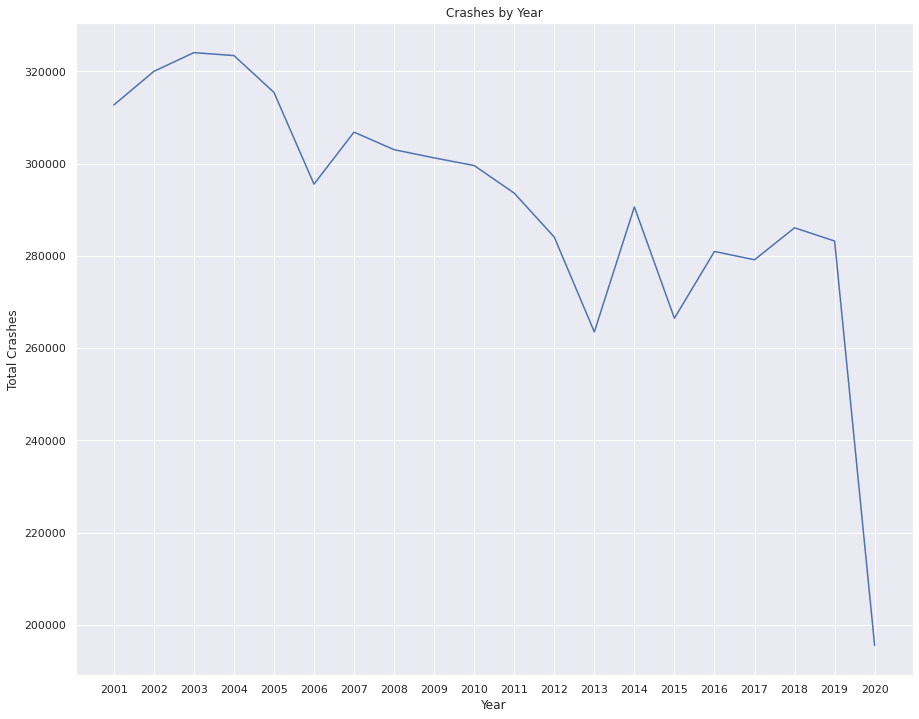

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,12))
sns.set_theme(style="darkgrid")
ax =sns.lineplot(data=df1a, x='Year', y='Total Crashes')
ax.set(title='Crashes by Year')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()
plt.savefig('Crashes by Year');

In [ ]:
dfa = df.groupby('Year', as_index = False)['Total Killed','Total Injured'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


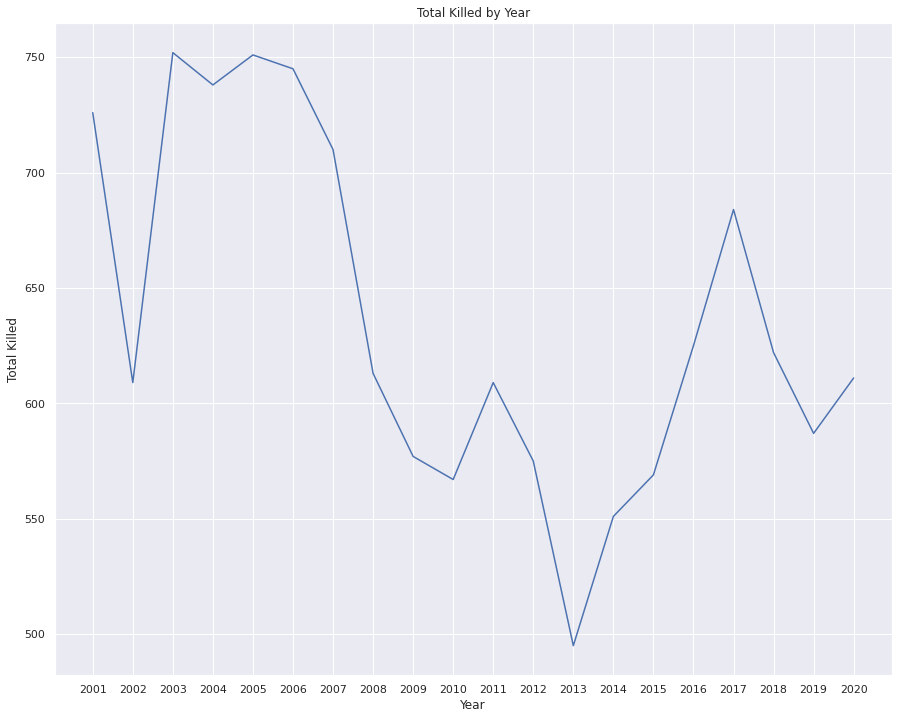

In [ ]:
plt.figure(figsize=(15,12))
sns.set_theme(style="darkgrid")
ax =sns.lineplot(data=dfa, x='Year', y='Total Killed')
ax.set(title='Total Killed by Year')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show();

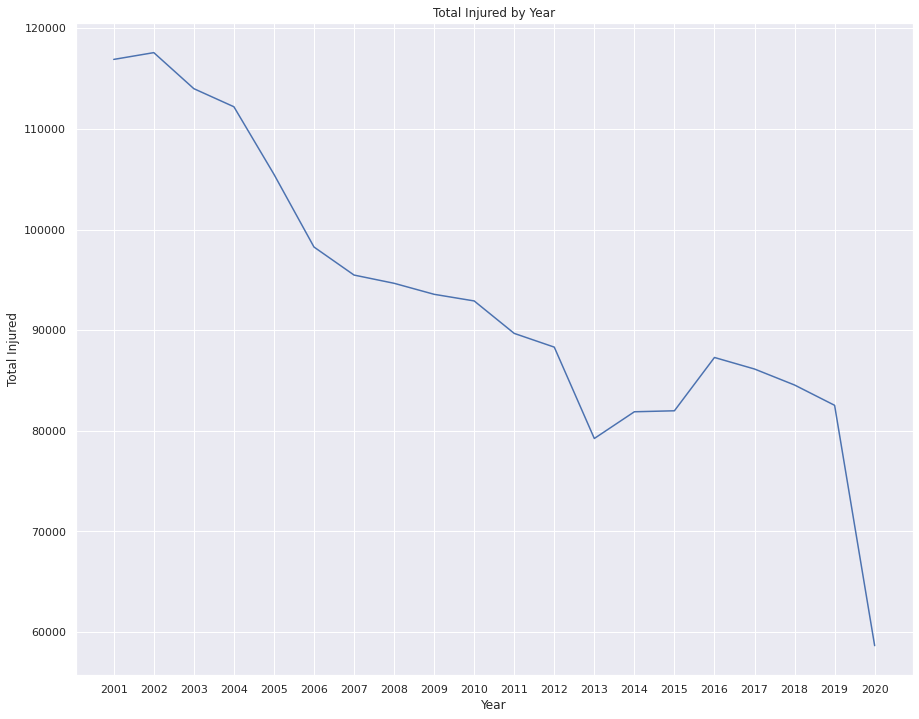

In [ ]:
plt.figure(figsize=(15,12))
sns.set_theme(style="darkgrid")
ax =sns.lineplot(data=dfa, x='Year', y='Total Injured')
ax.set(title='Total Injured by Year')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show();

In [ ]:
df_new = df.loc[(df['Year']==2020) & df['Longitude'].isnull()]

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 5635648 to 5791507
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        9 non-null      int64  
 1   Crash_ID                          7 non-null      object 
 2   County Name                       8 non-null      object 
 3   Municipality Name                 0 non-null      object 
 4   Crash Date                        0 non-null      object 
 5   Crash Day of Week                 0 non-null      object 
 6   Crash Time                        0 non-null      object 
 7   Police Department Code            0 non-null      object 
 8   Police Department                 0 non-null      object 
 9   Police Station                    0 non-null      object 
 10  Total Killed                      0 non-null      float64
 11  Total Injured                     0 non-null      float64
 12  

In [ ]:
list(df_new['Longitude'])

[nan, nan, nan, nan, nan, nan, nan, nan, nan]